In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Test the loaders

In [2]:
from dask.distributed import Client, LocalCluster
import dask.bag as db

In [3]:
dask_cluster = LocalCluster(n_workers=20, threads_per_worker=1)
dask_client = Client(dask_cluster)

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33429 instead
  warnings.warn(


In [4]:
dask_client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33429/status,
Dashboard: http://127.0.0.1:33429/status,Workers: 20
Total threads: 20,Total memory: 31.17 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42111,Workers: 20
Dashboard: http://127.0.0.1:33429/status,Total threads: 20
Started: Just now,Total memory: 31.17 GiB
Comm: tcp://127.0.0.1:45347,Total threads: 1
Dashboard: http://127.0.0.1:35745/status,Memory: 1.56 GiB
Nanny: tcp://127.0.0.1:42501,


In [5]:
from cai_common.data import TeiLoader, CorpusSplitType

In [6]:
kangyur_bag = dask_client.persist(TeiLoader("kangyur").to_bag(split_type=CorpusSplitType.BY_SENTENCE))

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding

In [7]:
kangyur_bag.count().compute()

202654

In [8]:
kangyur_bag.map(len).max().compute()

2427

In [9]:
kangyur_bag.filter(lambda x: len(x) == 2427).count().compute()

1

In [10]:
kangyur_bag.filter(lambda x: len(x) == 2427).compute()

['They are as follows:    Sarva\xadtathāgatābhiṣiktā (She Who Was Empowered by All Tathāgatas),  Sarva\xaddevatābhiṣiktā (She Who Was Empowered by All Gods),  Sarva\xadtathāgata\xadmātṛ (Mother of All Tathāgatas),  Sarva\xaddevatā\xadmātṛ (Mother of All Gods),   Sarva\xadtathāgata\xadśrī (Glory of All Tathāgatas),  Sarva\xadbodhisattva\xadśrī (Glory of All Bodhisattvas),  Sarvārya\xadśrāvaka\xadpratyeka\xadbuddha\xadśrī (Glory of All Āryaśrāvakas and Pratyekabuddhas),  Brahma\xadviṣṇu\xadmaheśvara\xadśrī (Glory of Brahmā, Viṣṇu, and Maheśvara),   Mahā\xadsthāna\xadgata\xadśrī (Glory Present in Great Places),   Sarva\xaddevatābhimukha\xadśrī (Glory in the Presence of All Gods),   Sarva\xaddeva\xadnāga\xadyakṣa\xadgandharvāsura\xadgaruḍa\xadkiṃnara\xadmahoraga\xadśrī (Glory of All the Gods, Nāgas, Yakṣas, Gandharvas, Asuras, Garuḍas, Kiṃnaras, and Mahoragas),  Sarva\xadvidyā\xaddhara\xadvajra\xadpāṇi\xadvajra\xaddhara\xadśrī (Glory of All the Vidyādharas, Vajrapāṇi and Vajradharas),   Ca

In [11]:
kangyur_bag = dask_client.persist(TeiLoader("kangyur").to_bag())

In [12]:
kangyur_bag.count().compute()

12826

In [13]:
kangyur_bag.take(20)

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/dask/bag/core.py:2498: UserWarning: Insufficient elements for `take`. 20 elements requested, only 3 elements available. Try passing larger `npartitions` to `take`.
  warnings.warn(


('  The Translation  The Noble Mahāyāna Sūtra Entitled Teaching the Four Factors    ',
 ' Homage to all the buddhas and bodhisattvas!   Thus did I hear at one time. The Blessed One was dwelling in the Sudharmā assembly hall in the Heaven of the Thirty-Three, together with a great gathering of five hundred monks, and very many bodhisattva mahāsattvas, including Maitreya and Mañjuśrī.   At that time the Blessed One said to the bodhisattva mahāsattva Maitreya, ',
 ' “O Maitreya, bodhisattva mahāsattva, if you possess four factors, the misdeeds you have committed and accumulated will be overcome.   “What are these four? The action of repentance, antidotal action, the power of restraint, and the power of support.   “The action of repentance is to feel intense remorse for any non-virtuous action you have committed.  “Antidotal action is to put great effort into virtuous actions once you have committed a non-virtuous action.  “The power of restraint is to make a pledge and thereby refrain fro

In [14]:
kangyur_df = dask_client.persist(TeiLoader("kangyur").dataframe)

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding

In [15]:
kangyur_df.head(20)

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding

,filename,volume_number,tohoku_number,location,text
0,066-007_toh249-the_sutra_teaching_four_factors...,66,toh249,None,The Translation The Noble Mahāyāna Sūtra En...
1,066-007_toh249-the_sutra_teaching_four_factors...,66,toh249,F.59.a,Homage to all the buddhas and bodhisattvas! ...
2,066-007_toh249-the_sutra_teaching_four_factors...,66,toh249,F.59.b,"“O Maitreya, bodhisattva mahāsattva, if you p..."


/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding

In [16]:
kangyur_df.filename.unique().compute()

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding

0      066-007_toh249-the_sutra_teaching_four_factors...
1               064-001_toh231-the_jewel_cloud_sutra.xml
2                043-007_toh70-question_of_%20subahu.xml
3      072-008_toh308_questions_regarding_death_and_t...
4      043-015_toh78-the_sutra_of_gunaratnasankusumit...
                             ...                        
133    088-009_toh515,855-the_incantation_the_essence...
134    039-002_toh46-the_teaching_on_clearing_the_bou...
135             066-002_toh244-proper_dharma_conduct.xml
136    071-014_toh300_reliance_upon_virtuous_spiritua...
137    066-005_toh247-the_sutra_on_how_to_distinguish...
Name: filename, Length: 138, dtype: object

In [17]:
len(kangyur_df.volume_number.unique().compute())

40

In [18]:
kangyur_df[kangyur_df.tohoku_number == "toh11"].compute()

,filename,volume_number,tohoku_number,location,text
0,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,None,The Translation The Noble Mahāyāna Sūtra The ...
1,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.1.b,Homage to all the buddhas and bodhisattvas! ...
2,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.2.a,Their speech was honest with a smiling demean...
3,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.2.b,heading many thousands of accompanying bodhis...
4,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.3.a,"Thereupon, the Blessed One inspired Senior Ś..."
...,...,...,...,...,...
786,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.395.a,"or the enlightenment of the pratyekabuddhas, ..."
787,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.395.b,"Likewise, so long will the gods of [all the o..."
788,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.396.a,and diverse musical sounds! “If you ask why...
789,031-002_toh11_perfection_of_wisdom_in_ten_thou...,31,toh11,F.396.b,it is because all the attributes of the aspec...


In [19]:
kangyur_df.text.map(len).max().compute()

5949.0

In [20]:
kangyur_df[kangyur_df.text.map(len) == 5801].compute()

,filename,volume_number,tohoku_number,location,text
958,088-038_toh543-the_root_tantra_of_manjusri.xml,88,toh543,F.344.a,Will be destined to attain the final goal of...


In [21]:
kangyur_df[kangyur_df.text.map(len) == 5801].compute().text[958]

'  Will be destined to attain the final goal of awakening. In Madhyadeśa, there will be a brahmin Known by the name of Sampūrṇa.      “There will also be Vinaya, Suvinaya, And Pūrṇa, the citizen of Mathurā. There will be a royal treasurer with the initial Bh, A worshiper of mantra [deities].      “These brahmins, foretold as Worshipers of the Teacher’s teachings, Will be members of different houses and lineages, Prominent at the beginning, middle, and end.      “These and other brahmins will worship Among [other] brahmins in different places. They will belong to different brahmanical orders and lineages And will follow different types of practices. They are foretold as full-fledged ascetics, Ordained as novices and very learned.      “The self-realized buddha, the Dharma king  Who fulfills the aims of all beings, Is glorified by all the spirits And also by the three gods.      “The four great kings Are celebrated in all the worlds. They are Virūḍhaka, Virūpākṣa, Dhṛtarāṣṭra, and the ki

<AxesSubplot:>

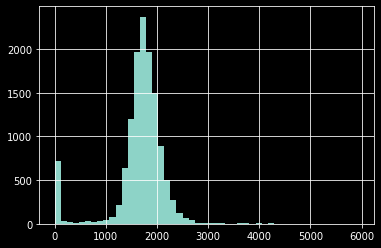

In [22]:
kangyur_df.text.map(len).compute().hist(bins=50)

# Experiments to design the loaders

In [1]:
import os
import re
from tqdm.notebook import tqdm
from bs4.element import Comment, NavigableString, Tag, XMLProcessingInstruction
from bs4 import BeautifulSoup, SoupStrainer

In [2]:
ns = "http://www.tei-c.org/ns/1.0"    # XML namespace for the TEI tags

In [3]:
bad_fns = set([
    '079-008_toh381OLD-the_emergence_from_samputa%20(20190216).xml',
    '040-005_toh54-the_chapter_on_the_complete_approach.xml',
    '057-010_toh151-the_sutra_of_the_questions_of_pratibhanamati.xml',
    '066-007_toh249-the_sutra_teaching_four_qualities.xml',
    '077-002_toh361-a_summary_explanation_of_the_initiation.xml'])

# Tag treatment mapping

NOTES:

- Unwrapping 'head' tags is a bit controversial, 84,000 do not translate the headings word-for-word. In the Kangyur the headings say "In the language of India: SHAY SANSKRIT TEXT SHAY. In Tibetan: TIBETAN TITLE SHAY

In [4]:
tag_treatments = {
    'term': 'unwrap',
    'div': 'SPECIAL',
    'lg': 'unwrap',
    'lb': 'decompose',
    'milestone': 'decompose',
    'foreign': 'unwrap',
    'ref': 'SPECIAL',
    'distinct': 'unwrap',
    'emph': 'unwrap',
    'title': 'unwrap',
    'head': 'unwrap',
    'q': 'unwrap',
    'l': 'unwrap',
    'trailer': 'unwrap',
    'note': 'decompose',
    'p': 'unwrap',
    'mantra': 'unwrap',
    'list': 'unwrap',
    'item': 'unwrap',
    'fix': '',
    'cell': '',
    'row': '',
    'table': '',
    'seg': '',
    'label': 'decompose'}

In [5]:
refs_to_strip = {'bampo', 'sanskrit', 'volume'}

In [6]:
def _treat_tags(soup):
    for tag_name, tag_treatment in tag_treatments.items():
        for elem in soup.find_all(tag_name):
            if tag_treatment == 'decompose':
                elem.decompose()
            elif tag_treatment == 'unwrap':
                elem.unwrap()
    return soup

In [7]:
def _treat_divs_and_refs(soup, toh_key, num_toh_keys):
    for ref in soup.find_all("ref"):
        if ref.attrs.get('type', None) in refs_to_strip:
            ref.decompose()
        else:
            if not 'key' in ref.attrs and num_toh_keys > 1:
                raise Exception("No 'key' attribute in ref tag {}, but more than one Tohoku number for the text {}".format(elem, toh_key))
            if not ('key' not in ref.attrs or ref.attrs.get('key', None) == toh_key) or not 'cRef' in ref.attrs:
                ref.decompose()
    for div in soup.find_all("div"):
        div.unwrap()
    return soup

In [8]:
def _segment_folios(soup):
    space_re = re.compile(r"\s+")
    segmentation, cur_ref, cur_text = [], None, ''
    for elem in soup.next_elements:
        if type(elem) is NavigableString:
            cur_text += space_re.sub(' ', elem.string)
        elif type(elem) is Tag:
            if not elem.name == 'ref' or not elem.attrs.get('type', 'folio') == 'folio':
                raise ValueError("Bad tag: name {}, type {}".format(elem.name, elem.attrs.get('type', 'none')))
            segmentation.append((cur_ref, cur_text))
            cur_text, cur_ref = '', elem['cRef']
        elif type(elem) is Comment:
            pass
        elif type(elem) is XMLProcessingInstruction:
            pass
        else:
            raise ValueError("Bad tag {}".format(elem))
    segmentation.append((cur_ref, cur_text))
    return segmentation

In [9]:
[tag for tag, treatment in tag_treatments.items() if treatment == '']

['fix', 'cell', 'row', 'table', 'seg']

# Sanity checks

## Find files with untagged refs

In [ ]:
root_dir = "../../tibert_data/84000/data-tei/translations/kangyur/translations/"

In [ ]:
fns = [os.path.join(root_dir, fn) for fn in os.listdir(root_dir) if fn not in bad_fns]

In [ ]:
fns_with_bad_refs = set()
for fn in tqdm(fns):
    with open(fn, mode='r', encoding='utf-8') as f:
        soup = BeautifulSoup(
            f,
            'xml',
            from_encoding='UTF8',
            parse_only=SoupStrainer("div", type="translation"))
        for elem in soup.find_all("ref"):
            if not 'cRef' in elem.attrs:
                fns_with_bad_refs.add(fn)
                print(fn, elem)

**CONCLUSION**: Drop all references without a cRef

## Try on a single file

In [ ]:
fn = "../../tibert_data/84000/data-tei/translations/kangyur/translations/051-002_toh114,527-king_of_array_of_all_dharma_qualities.xml"
toh_key = 'toh527'

In [ ]:
with open(fn, mode='r', encoding='utf-8') as f:
    soup = BeautifulSoup(
        f,
        'xml',
        from_encoding='UTF8',
        parse_only=SoupStrainer("div", type="translation"))

In [ ]:
_ = _apply_toh_key(soup, toh_key)

In [ ]:
for elem in soup.find_all("ref"):
    print(elem)

In [ ]:
_treat_tags(soup)

In [ ]:
len(soup.find_all("div", type="translation"))

In [ ]:
tag_names = set()
for div in soup.find_all("div", type="translation"):
    for child in div.descendants:
        tag_names.add(child.name)
tag_names

In [ ]:
_treat_divs_and_refs(soup)

In [ ]:
elem_types = set()
for elem in soup.next_elements:
    elem_types.add(type(elem))
elem_types

In [ ]:
soup

In [ ]:
for elem in soup.find_all("ref"):
    print(elem.attrs)

In [ ]:
_segment_folios(soup)

## Look through all files for leftover tags

In [ ]:
root_dir = "../../tibert_data/84000/data-tei/translations/kangyur/translations/"

In [ ]:
fns = [os.path.join(root_dir, fn) for fn in os.listdir(root_dir) if fn not in bad_fns]

In [ ]:
num_translations, tag_names, tags_by_text, ref_types = {}, set(), {}, set()
for fn in tqdm(fns, desc="Files"):
    with open(fn, mode='r', encoding='utf-8') as f:
        soup = BeautifulSoup(
            f,
            'xml',
            from_encoding='UTF8',
            parse_only=SoupStrainer("div", type="translation"))
        _treat_tags(soup)
        text_name = fn.split('/')[-1][:-4]
        num_translations[text_name] = len(soup.find_all("div", type="translation"))
        tags_by_text[text_name] = set()
        for div in soup.find_all("div", type="translation"):
            for child in div.descendants:
                tag_names.add(child.name)
                tags_by_text[text_name].add(child.name)
        for ref in soup.find_all("ref"):
            ref_types.add(ref.attrs.get('type', None))
set(num_translations.values()), tag_names

In [ ]:
ref_types

In [ ]:
texts_by_tag, tag_rarity = {}, {}
for text_name, tags in tags_by_text.items():
    for tag in tags:
        texts_by_tag[tag] = texts_by_tag.get(tag, set())
        texts_by_tag[tag].add(text_name)
for tag, texts in texts_by_tag.items():
    tag_rarity[tag] = len(texts)
tag_rarity, len(tags_by_text)

In [ ]:
texts_by_tag["seg"]

In [ ]:
set(tags_by_text.keys()).difference(set(texts_by_tag["ref"]))

In [ ]:
fn = os.path.join(root_dir, "046-001_toh95_play_in_full.xml")
with open(fn, mode='r', encoding='utf-8') as f:
    soup = BeautifulSoup(
        f,
        'xml',
        from_encoding='UTF8',
        parse_only=SoupStrainer("div", type="translation"))
    _treat_tags(soup)

In [ ]:
[tag for tag in soup.find_all("list")]

# Do all files

In [10]:
from dask.distributed import Client, LocalCluster
import dask.bag as db
import dask.dataframe as df

In [11]:
dask_cluster = LocalCluster(n_workers=20, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [12]:
dask_client

Client Scheduler: tcp://127.0.0.1:61047 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 20 Cores: 20 Memory: 17.10 GB


In [13]:
root_dir = "../../tibert_data/84000/data-tei/translations/kangyur/translations/"

In [14]:
fns = [os.path.join(root_dir, fn) for fn in os.listdir(root_dir) if fn not in bad_fns]

In [ ]:
fns_toh_keys = {}
toh_re = re.compile("_toh[\d,]+[-_]")
for fn in fns:
    toh_re_res = toh_re.search(fn)
    if toh_re_res:
        fns_toh_keys[fn] = ['toh' + toh_num for toh_num in toh_re_res.group(0)[4:-1].split(',')]
    else:
        fns_toh_keys[fn] = []

## Parse a Dask bag of all files

In [ ]:
def _process_file(fn):
    text_name = fn.split("\\")[-1][:-4]
    root = ET.parse(fn).getroot()
    return [(text_name, ref, text) for ref, text in segment_subtext_by_refs(root)]


def _process_file_str(file_str):
    text_name = fn.split("\\")[-1][:-4]
    root = ET.fromstring(file_str)
    return [(text_name, ref, text) for ref, text in segment_subtext_by_refs(root)]

In [15]:
def _process_fstr(args):
    fn, toh_key, num_toh_keys, fstr = args
    text_name = fn.split("/")[-1][:-4]
    soup = BeautifulSoup(fstr, 'xml', from_encoding='UTF8', parse_only=SoupStrainer("div", type="translation"))
    return [(text_name, toh_key, ref, text) for ref, text in _segment_folios(_treat_divs_and_refs(_treat_tags(soup), toh_key, num_toh_keys))]

### Try it in serial first

In [ ]:
processed = {}

# fns = ['../../tibert_data/84000/data-tei/translations/kangyur/translations/001-001_toh1-1_chapter_on_going_forth.xml']

for fn in tqdm(fns):
    for toh_key in fns_toh_keys[fn]:
#         print(fn, toh_key)
        args = (fn, toh_key, len(fns_toh_keys[fn]), open(fn, mode='r', encoding='utf-8').read())
        processed[(fn, toh_key)] = _process_fstr(args)

### Now go to Dask

In [17]:
def _fn_to_tohs(args):
    fn, fstr = args
    toh_re_res = re.compile("_toh[\d,]+[-_]").search(fn)
    if toh_re_res:
        toh_keys = ['toh' + toh_num for toh_num in toh_re_res.group(0)[4:-1].split(',')]
        return [(fn, toh_key, len(toh_keys), fstr) for toh_key in toh_keys]
    else:
        return []


kangyur_84000_bag = db \
    .from_sequence(set(fns)) \
    .map(lambda fn: (fn, open(fn, mode='r', encoding='utf-8').read())) \
    .map(_fn_to_tohs) \
    .flatten() \
    .map(_process_fstr) \
    .flatten()

In [ ]:
kangyur_84000_bag.take(20)

## Convert the bag into a dataframe

In [18]:
kangyur_84000_df = dask_client.persist(kangyur_84000_bag.to_dataframe(columns=["filename", "tohoku_number", "location", "text"]))

In [19]:
kangyur_84000_df

,filename,tohoku_number,location,text
npartitions=123,,,,
,object,object,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [20]:
kangyur_84000_df[kangyur_84000_df.location.isna()].count().compute()

filename         146
tohoku_number    146
location           0
text             146
dtype: int64

In [21]:
kangyur_84000_df[kangyur_84000_df.location.isna()].compute()

,filename,tohoku_number,location,text
0,066-003_toh245-the_sections_of_dharmas,toh245,None,The Translation The Noble Great Vehicle Sūt...
0,"068-007_toh273,511,853-the_sutra_of_the_twelve...",toh273,None,The Translation The Noble Mahāyāna Sūtra Th...
9,"068-007_toh273,511,853-the_sutra_of_the_twelve...",toh511,None,The Translation The Noble Mahāyāna Sūtra Th...
25,"068-007_toh273,511,853-the_sutra_of_the_twelve...",toh853,None,The Translation The Noble Mahāyāna Sūtra Th...
0,"094-013_toh736,995-the_incantation_of_parnasabari",toh736,None,The Translation The Noble Dhāraṇī of Parṇaś...
...,...,...,...,...
0,061-006_toh186_miracle_of_attaining_the_buddha...,toh186,None,The Translation The Noble Sūtra of the Great ...
0,059-008_toh165-question_of_ksemamkara,toh165,None,The Translation The Noble Great Vehicle Sūt...
0,060-008_toh179_teaching_the_relative_and_ultim...,toh179,None,The Translation The Noble Great Vehicle Sūtr...
0,061-004_toh184-the_sutra_teaching_the_conduct_...,toh184,None,The Translation The Noble Great Vehicle Sūt...


In [22]:
kangyur_84000_df.text.map(len).max().compute()

5801.0

In [23]:
kangyur_84000_df[kangyur_84000_df.text.map(len) == 5801].compute()

,filename,tohoku_number,location,text
958,088-038_toh543-the_root_tantra_of_manjusri,toh543,F.344.a,Will be destined to attain the final goal of...


In [24]:
kangyur_84000_df[kangyur_84000_df.text.map(len) == 5801].compute().text[958]

'  Will be destined to attain the final goal of awakening. In Madhyadeśa, there will be a brahmin Known by the name of Sampūrṇa.      “There will also be Vinaya, Suvinaya, And Pūrṇa, the citizen of Mathurā. There will be a royal treasurer with the initial Bh, A worshiper of mantra [deities].      “These brahmins, foretold as Worshipers of the Teacher’s teachings, Will be members of different houses and lineages, Prominent at the beginning, middle, and end.      “These and other brahmins will worship Among [other] brahmins in different places. They will belong to different brahmanical orders and lineages And will follow different types of practices. They are foretold as full-fledged ascetics, Ordained as novices and very learned.      “The self-realized buddha, the Dharma king  Who fulfills the aims of all beings, Is glorified by all the spirits And also by the three gods.      “The four great kings Are celebrated in all the worlds. They are Virūḍhaka, Virūpākṣa, Dhṛtarāṣṭra, and the ki

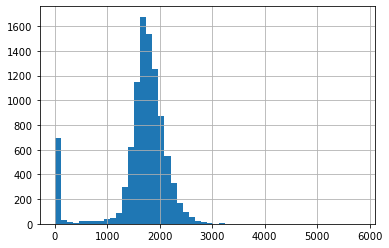

In [25]:
kangyur_84000_df.text.map(len).compute().hist(bins=50)

# Sentence segmentation

In [1]:
from dask.distributed import Client, LocalCluster
import dask.bag as db

In [2]:
dask_cluster = LocalCluster(n_workers=20, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [3]:
dask_client

Client Scheduler: tcp://127.0.0.1:60860 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 20 Cores: 20 Memory: 17.10 GB


In [4]:
from tibert.data import TeiLoader

In [5]:
kangyur_bag = dask_client.persist(TeiLoader("../../tibert_data/", "kangyur").to_bag())

In [6]:
test_strs = kangyur_bag.take(20)

In [8]:
import re

In [21]:
[sent.strip() for sent in re.sub("[.?!]", lambda match: match.group() + '\u2406', test_strs[1]).split("\u2406")]

['In the language of India, this scripture is called Vinayavastu.',
 'In the language of Tibet, it is called Dulwa Shi.',
 'Homage to the Three Jewels.',
 'Homage to him who severed the bonds, Destroyed the whole host of tīrthikas, Vanquished the armies of Māra, And thus discovered this awakening.',
 'At first to renounce a householder’s concerns and go forth is hard.',
 'For a hedonist to be happy among renunciants is hard.',
 'For the joyful set on perfection to act perfectly is hard.',
 'For a learned wearer of the saffron robes to fall is hard.',
 'The Chapters on Monastic Discipline includes chapters on: Going forth, purification,  Lifting restrictions, the rains, leather, Medicine, robes, turning cloth into robes,  The monks of Kauśāmbī, formal acts of saṅgha, A group of troublesome monks, types of persons, Demotions, suspension of the purification, Housing,']

In [7]:
import spacy

In [8]:
from spacy.lang.en import English
nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer'))
nlp_better = spacy.load('en_core_web_sm')

In [13]:
test_str = test_strs[1]
test_str

' In the language of India, this scripture is called Vinayavastu. In the language of Tibet, it is called Dulwa Shi.      Homage to the Three Jewels.    Homage to him who severed the bonds, Destroyed the whole host of tīrthikas, Vanquished the armies of Māra, And thus discovered this awakening.    At first to renounce a householder’s concerns and go forth is hard. For a hedonist to be happy among renunciants is hard. For the joyful set on perfection to act perfectly is hard. For a learned wearer of the saffron robes to fall is hard.     The Chapters on Monastic Discipline includes chapters on: Going forth, purification,  Lifting restrictions, the rains, leather, Medicine, robes, turning cloth into robes,  The monks of Kauśāmbī, formal acts of saṅgha, A group of troublesome monks, types of persons, Demotions, suspension of the purification, Housing, '

In [14]:
doc = nlp(test_str)
sentences = [sent.string.strip() for sent in doc.sents]
sentences

['In the language of India, this scripture is called Vinayavastu.',
 'In the language of Tibet, it is called Dulwa Shi.',
 'Homage to the Three Jewels.',
 'Homage to him who severed the bonds, Destroyed the whole host of tīrthikas, Vanquished the armies of Māra, And thus discovered this awakening.',
 'At first to renounce a householder’s concerns and go forth is hard.',
 'For a hedonist to be happy among renunciants is hard.',
 'For the joyful set on perfection to act perfectly is hard.',
 'For a learned wearer of the saffron robes to fall is hard.',
 'The Chapters on Monastic Discipline includes chapters on: Going forth, purification,  Lifting restrictions, the rains, leather, Medicine, robes, turning cloth into robes,  The monks of Kauśāmbī, formal acts of saṅgha, A group of troublesome monks, types of persons, Demotions, suspension of the purification, Housing,']

In [15]:
doc = nlp_better(test_str)
sentences = [sent.string.strip() for sent in doc.sents]
sentences

['In the language of India, this scripture is called Vinayavastu.',
 'In the language of Tibet, it is called Dulwa Shi.',
 'Homage to the Three Jewels.',
 'Homage to him who severed the bonds, Destroyed the whole host of tīrthikas, Vanquished the armies of Māra, And thus discovered this awakening.',
 'At first to renounce a householder’s concerns and go forth is hard.',
 'For a hedonist to be happy among renunciants is hard.',
 'For the joyful set on perfection to act perfectly is hard.',
 'For a learned wearer of the saffron robes to fall is hard.',
 'The Chapters on Monastic Discipline includes chapters on: Going forth, purification,  Lifting restrictions, the rains, leather, Medicine, robes, turning cloth into robes,',
 'The monks of Kauśāmbī, formal acts of saṅgha, A group of troublesome monks, types of persons, Demotions, suspension of the purification, Housing,']

In [16]:
for sent in doc.sents:
    print(sent, sent.start, sent.end)

 In the language of India, this scripture is called Vinayavastu. 0 13
In the language of Tibet, it is called Dulwa Shi.       13 26
Homage to the Three Jewels.     26 33
Homage to him who severed the bonds, Destroyed the whole host of tīrthikas, Vanquished the armies of Māra, And thus discovered this awakening.     33 61
At first to renounce a householder’s concerns and go forth is hard. 61 75
For a hedonist to be happy among renunciants is hard. 75 86
For the joyful set on perfection to act perfectly is hard. 86 98
For a learned wearer of the saffron robes to fall is hard.      98 112
The Chapters on Monastic Discipline includes chapters on: Going forth, purification,  Lifting restrictions, the rains, leather, Medicine, robes, turning cloth into robes,   112 145
The monks of Kauśāmbī, formal acts of saṅgha, A group of troublesome monks, types of persons, Demotions, suspension of the purification, Housing, 145 174
